In [2]:
import pandas as pd

df = pd.read_csv("scraped_data_oregon.csv")

# Preprocessing:
df['Bathrooms'] = df['Bathrooms'].replace({25: 2.5, 21:2.5, 15: 1.5, 55: 5.5, 35: 3.5, 45:4.5})

# Function to add a comma before "Portland" in each address for geocoding
def add_comma_before_portland(address):
    if isinstance(address, str): 
        return address.replace("Portland", ", Portland")
    else:
        return None

df['Address'] = df['Address'].apply(add_comma_before_portland)
print(df)


         Price  Bedrooms  Bathrooms    Sqft  \
0    1599995.0       7.0        6.0  4591.0   
1     549000.0       4.0        2.5  1452.0   
2    1050000.0       4.0        3.0  2895.0   
3    1025000.0       4.0        3.0  3506.0   
4     510000.0       3.0        2.5  2355.0   
..         ...       ...        ...     ...   
281  2150000.0       3.0        3.5  3814.0   
282   300000.0       2.0        1.0  7047.0   
283   675000.0       3.0        2.0  2062.0   
284   468900.0       2.0        2.0  1206.0   
285        NaN       NaN        NaN     NaN   

                                            Address  ZIP Code  
0         15661 NW Gooderham St, Portland, OR 97229   97229.0  
1              2601 SE 141st St, Portland, OR 97236   97236.0  
2              2505 NE 45th Ave, Portland, OR 97213   97213.0  
3           1528 SW Westwood Ct, Portland, OR 97239   97239.0  
4               8644 NE Dyer St, Portland, OR 97220   97220.0  
..                                              ...

In [3]:
df.dropna(inplace=True)

In [4]:
df.to_csv("preprocessed_scraped_oregon.csv", index=False)

In [5]:
OR_df = pd.read_csv("preprocessed_scraped_oregon.csv")

In [6]:
OR_df.tail()

,Price,Bedrooms,Bathrooms,Sqft,Address,ZIP Code
235,339777.0,1.0,1.5,7247.0,"81 N Hayden Bay Dr Unit BLD-D, Portland, OR 97217",97217.0
236,2150000.0,3.0,3.5,3814.0,"1414 SW 3rd Ave Apt 3001, Portland, OR 97201",97201.0
237,300000.0,2.0,1.0,7047.0,"8316 SE 74th Ave, Portland, OR 97206",97206.0
238,675000.0,3.0,2.0,2062.0,"3327 SW 12th Ave, Portland, OR 97239",97239.0
239,468900.0,2.0,2.0,1206.0,"1710 S Harbor Way Unit 304, Portland, OR 97201",97201.0


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

average_price = OR_df['Price'].mean()

most_expensive_property = OR_df.loc[OR_df['Price'].idxmax()]
least_expensive_property = OR_df.loc[OR_df['Price'].idxmin()]

print("Average property price:", average_price)
print("_______________________________________________________________")
print("Most expensive property:\n", most_expensive_property)
print("_______________________________________________________________")
print("Least expensive property:\n", least_expensive_property)


Average property price: 675666.2333333333
_______________________________________________________________
Most expensive property:
 Price                                        5500000.0
Bedrooms                                           6.0
Bathrooms                                          5.5
Sqft                                            9831.0
Address      1816 SW Hawthorne Ter, Portland, OR 97201
ZIP Code                                       97201.0
Name: 57, dtype: object
_______________________________________________________________
Least expensive property:
 Price                                                 36000.0
Bedrooms                                                  1.0
Bathrooms                                                 1.0
Sqft                                                   4804.0
Address      16745 SE Division St Unit 53, Portland, OR 97236
ZIP Code                                              97236.0
Name: 128, dtype: object


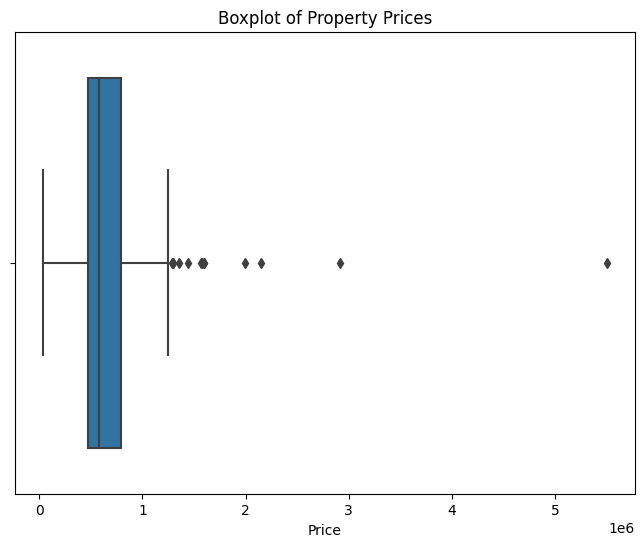

In [8]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Price', data=OR_df, orient='h')
plt.title('Boxplot of Property Prices')
plt.xlabel('Price')
plt.show()


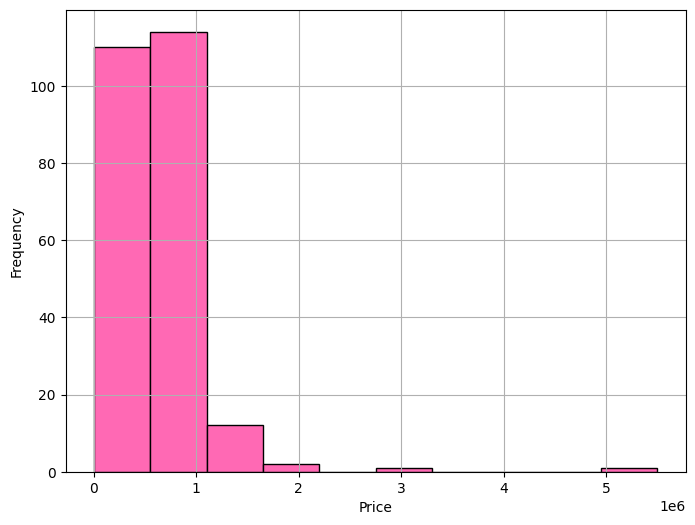

In [9]:
price_range = (0, max(OR_df['Price']))

plt.figure(figsize=(8, 6))
plt.hist(OR_df['Price'], bins=10, range=price_range, color='hotpink', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

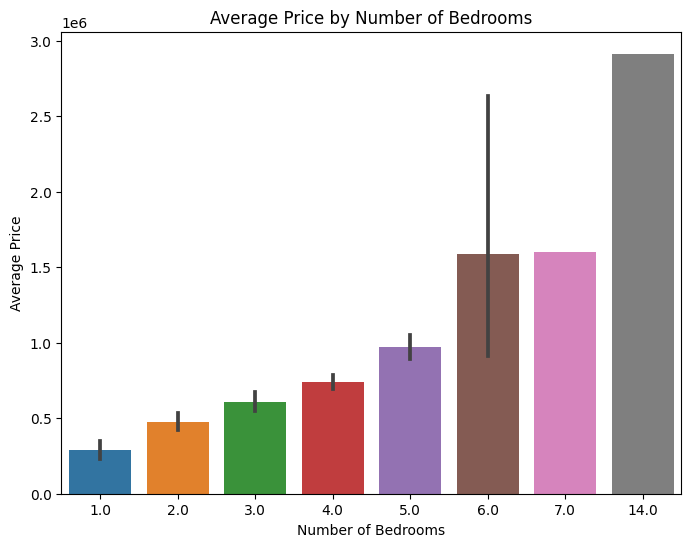

In [10]:
# Barplot to visualize the average price by number of bedrooms
plt.figure(figsize=(8, 6))
sns.barplot(x='Bedrooms', y='Price', data=OR_df)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

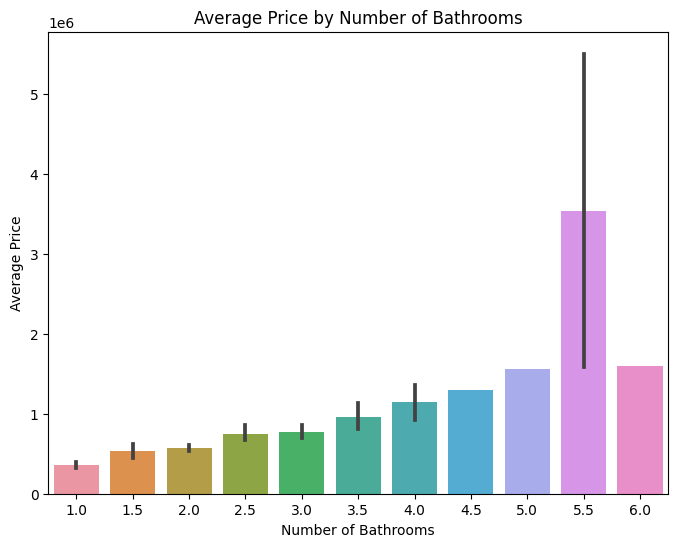

In [11]:
# Barplot to visualize the average price by number of bathrooms
plt.figure(figsize=(8, 6))
sns.barplot(x='Bathrooms', y='Price', data=OR_df)
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.show()

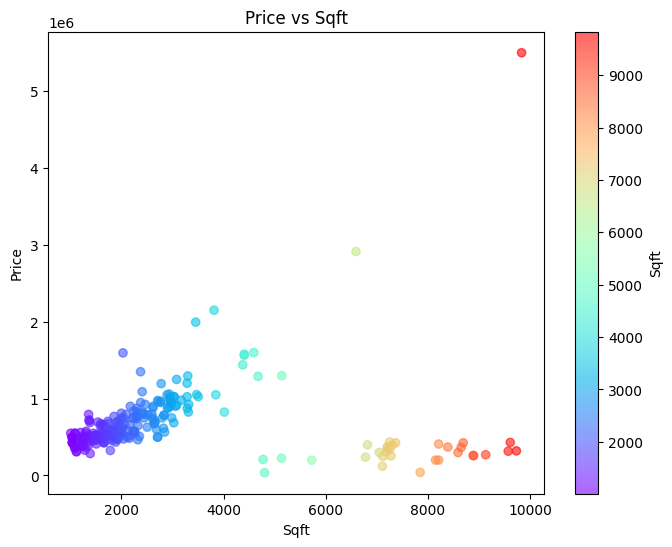

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
cmap = plt.cm.rainbow
norm = plt.Normalize(OR_df['Sqft'].min(), OR_df['Sqft'].max())
plt.scatter(OR_df['Sqft'], OR_df['Price'], c=OR_df['Sqft'], cmap=cmap, norm=norm, alpha=0.6)

cbar = plt.colorbar()
cbar.set_label('Sqft')

# Add labels and title
plt.title('Price vs Sqft')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()


<Figure size 1000x800 with 0 Axes>

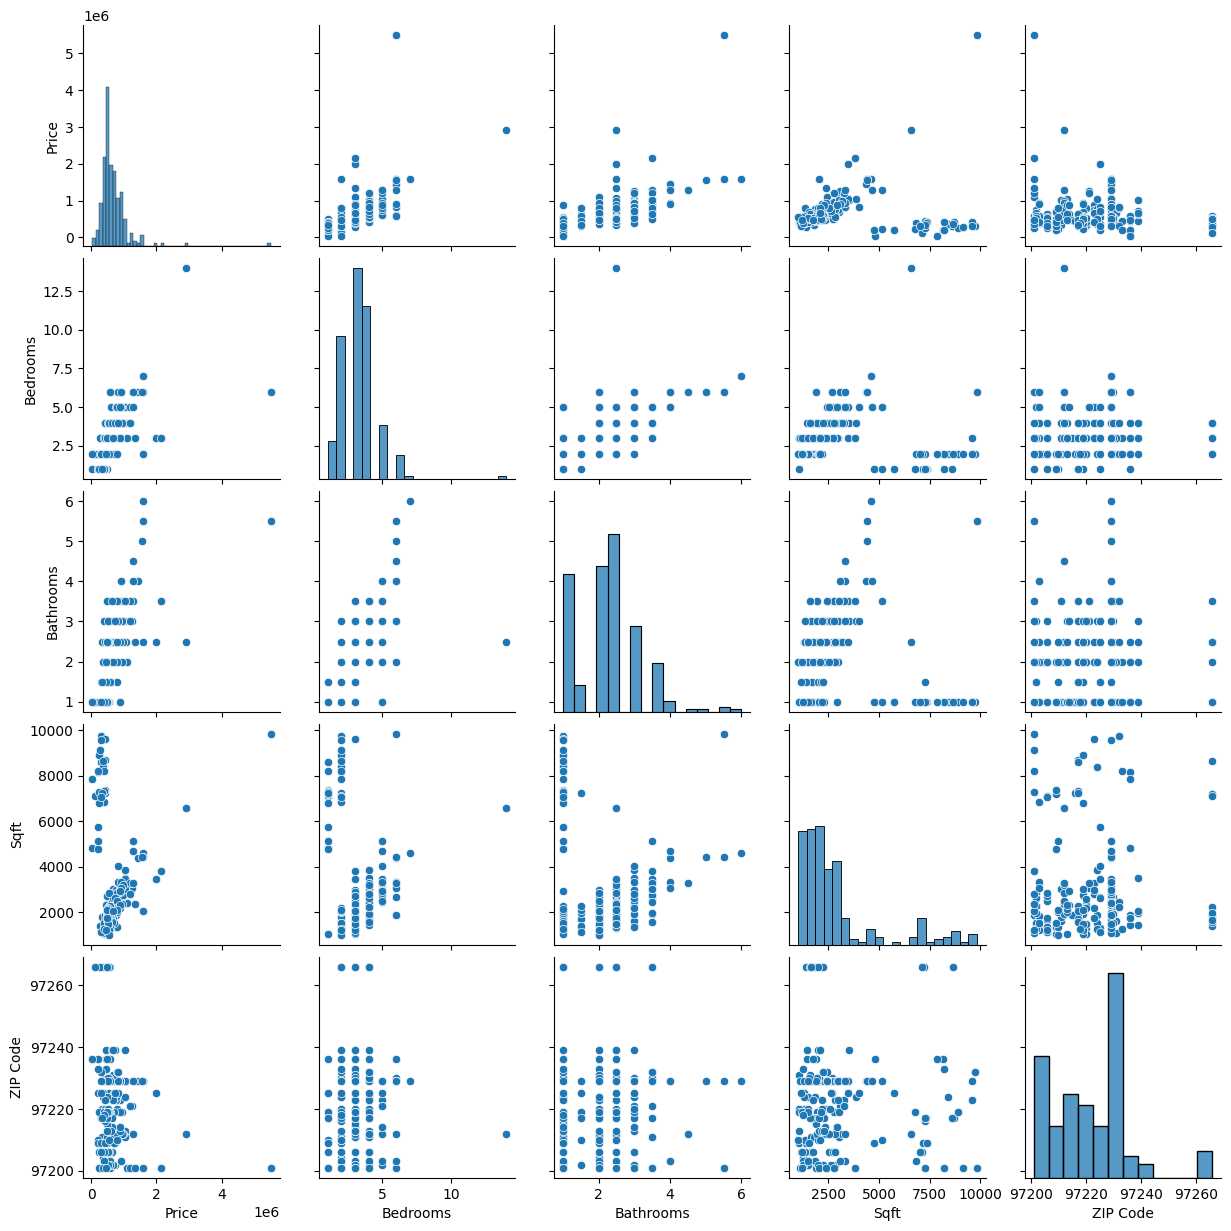

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("magma")

plt.figure(figsize=(10, 8))
sns.pairplot(OR_df)
plt.show()


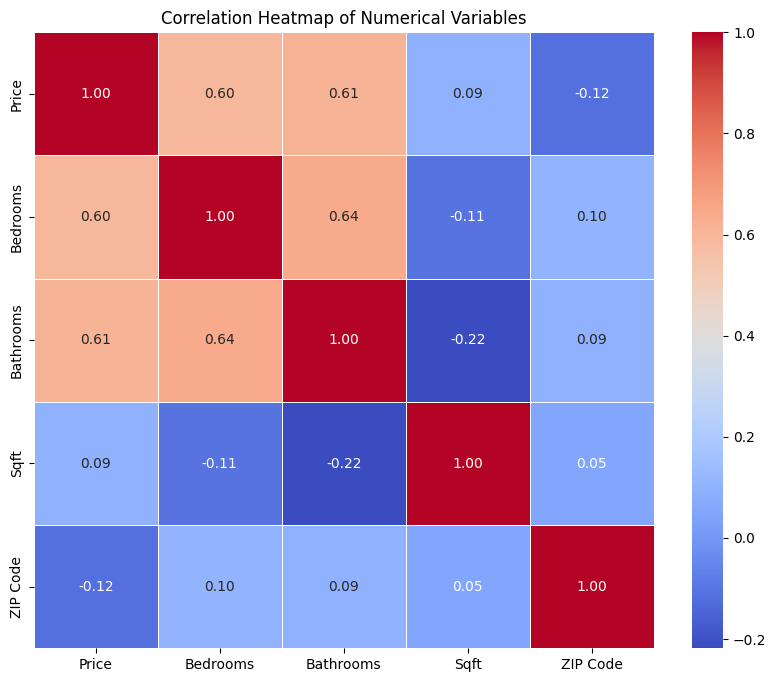

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = OR_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [17]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim
import re

portland_map = folium.Map(location=[45.5051, -122.6750], zoom_start=10)

# Geocoder to get lat and long from address 
geolocator = Nominatim(user_agent="portland_explorer")

for index, row in OR_df.iterrows():
    price = row['Price']
    bedrooms = row['Bedrooms']
    bathrooms = row['Bathrooms']
    sqft = row['Sqft']
    address = row['Address']
    zip_code = row['ZIP Code']
    
    # Geocode address to obtain latitude and longitude
    location = geolocator.geocode(address)
    if location:
        latitude = location.latitude
        longitude = location.longitude
        folium.Marker(location=[latitude, longitude], 
                      popup=f"Price: ${price}, Bedrooms: {bedrooms}, Bathrooms: {bathrooms}, Sqft: {sqft}, Address: {address}").add_to(portland_map)
    else:
        address_tigard = re.sub(r'Portland', 'Tigard', address, flags=re.IGNORECASE)
        location_tigard = geolocator.geocode(address_tigard)
        if location_tigard:
            latitude = location_tigard.latitude
            longitude = location_tigard.longitude
            folium.Marker(location=[latitude, longitude], 
                          popup=f"Price: ${price}, Bedrooms: {bedrooms}, Bathrooms: {bathrooms}, Sqft: {sqft}, Address: {address_tigard}").add_to(portland_map)
        else:
            continue

portland_map.save("folium_oregon.html")


In [23]:
portland_map